In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [0]:
from sklearn.datasets import load_boston
d=load_boston()

In [0]:
df = pd.DataFrame(d.data)
df.columns = d.feature_names
df["PRICE"] = d.target
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [0]:
df.shape

(506, 14)

In [0]:
type(df)

pandas.core.frame.DataFrame

In [0]:
print(d.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

PEARSON CORRELATION
             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       

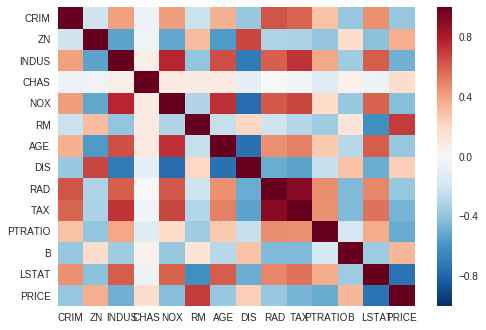

In [0]:
import seaborn as sns
print("PEARSON CORRELATION")
print(df.corr(method="pearson"))
sns.heatmap(df.corr(method="pearson"))

In [0]:
X = df.drop("PRICE", axis=1)
Y = df["PRICE"]
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
scaled_X = scaler.transform(X)

In [0]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
seed = 9
test_size = 0.20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = seed)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [0]:
#linear regression
from sklearn.linear_model import LinearRegression
reg =linear_model.LinearRegression()
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
folds   = 10
metric  = "neg_mean_squared_error"
k_fold  = KFold(n_splits=folds, random_state=seed)
results = cross_val_score(LinearRegression(), X_train, Y_train, cv=k_fold, scoring=metric)

In [0]:
results


array([ -9.81726576, -19.22185251, -28.33873653, -34.80210847,
       -10.44200878, -21.23397713, -22.95652957, -53.62427279,
       -23.3806275 , -14.12598018])

In [0]:
from sklearn.linear_model import LinearRegression
reg =linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print(reg.coef_)
print(reg.intercept_)

[-1.13857949e-01  4.26244079e-02  3.24416726e-02  2.02422869e+00
 -1.48729064e+01  3.94626653e+00 -3.73513877e-04 -1.36065848e+00
  2.80024959e-01 -1.22345482e-02 -8.74200433e-01  8.19816141e-03
 -5.24173305e-01]
32.72612668297042


In [0]:
ans_l=reg.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ans_l,Y_test)

In [0]:
mse


23.676620280791294

In [0]:
model_result=[]
model_result.append(mse)

In [0]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
181,0.06888,0.0,2.46,0.0,0.488,6.144,62.2,2.5979,3.0,193.0,17.8,396.90,9.45
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
99,0.06860,0.0,2.89,0.0,0.445,7.416,62.5,3.4952,2.0,276.0,18.0,396.90,6.19
220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
474,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14
175,0.06664,0.0,4.05,0.0,0.510,6.546,33.1,3.1323,5.0,296.0,16.6,390.96,5.33
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
284,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85
480,5.82401,0.0,18.10,0.0,0.532,6.242,64.7,3.4242,24.0,666.0,20.2,396.90,10.74
211,0.37578,0.0,10.59,1.0,0.489,5.404,88.6,3.6650,4.0,277.0,18.6,395.24,23.98


In [0]:
print(Y_train.shape)
print(Y_test.shape)

(404,)
(102,)


In [0]:
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [0]:
Y_train=Y_train.reshape(404,1)
Y_test=Y_test.reshape(102,1)

In [0]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [0]:
#support vector regression
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train_scaled=sc.fit_transform(X_train)
Y_train_scaled=sc.fit_transform(Y_train)
X_test_scaled=sc.fit_transform(X_test)
Y_test_scaled=sc.fit_transform(Y_test)

In [0]:
svr_rbf = SVR(kernel= 'rbf', C= 1e3,gamma= 0.1,epsilon=0.001)
svr_rbf.fit(X_train_scaled, Y_train_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
ans_s= svr_rbf.predict(X_test_scaled)

In [0]:
ans_s=ans_s.reshape(102,1)

In [0]:
ans_s=sc.inverse_transform(ans_s)

In [0]:
mse = mean_squared_error(ans_s,Y_test)
mse

27.517498936931293

In [0]:
model_result.append(mse)

In [0]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()

In [0]:
clf = clf.fit(X_train_scaled,Y_train_scaled)

In [0]:
ans_d= clf.predict(X_test_scaled)

In [0]:
ans_d=ans_d.reshape(102,1)
ans_d=sc.inverse_transform(ans_d)

In [0]:
mse = mean_squared_error(ans_d,Y_test)
mse

46.10550466230938

In [0]:
model_result.append(mse)

In [0]:
#random forest
from sklearn.ensemble import RandomForestRegressor

In [0]:
clf=RandomForestRegressor()

In [0]:
clf = clf.fit(X_train_scaled,Y_train_scaled)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
ans_r= clf.predict(X_test_scaled)
ans_r=ans_r.reshape(102,1)
ans_r=sc.inverse_transform(ans_r)

In [0]:
mse = mean_squared_error(ans_r,Y_test)
mse

32.27953052148149

In [0]:
model_result.append(mse)

In [0]:
from sklearn.linear_model import LinearRegression
reg =linear_model.LinearRegression()
reg.fit(X_train_scaled,Y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print(reg.coef_)
print(reg.intercept_)

[[-0.22510951  0.08998486  0.019465    0.04498286 -0.16062739  0.43119539
  -0.00080596 -0.33251167  0.14312387 -0.14246452 -0.18261076  0.07184869
  -0.42213423]]
[0.48490596]


In [0]:
ans= reg.predict(X_test_scaled)
ans=ans.reshape(102,1)
ans=sc.inverse_transform(ans)

In [0]:
mse = mean_squared_error(ans,Y_test)
mse

25.615415895390747

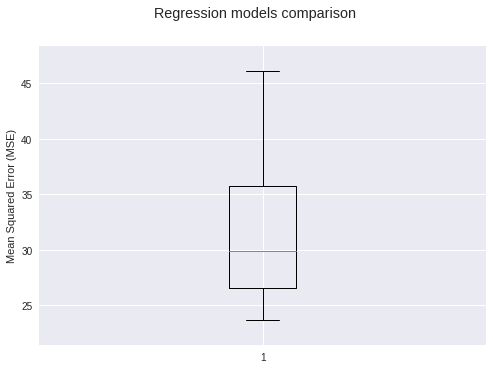

In [0]:

figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_result)
#axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)

plt.show()

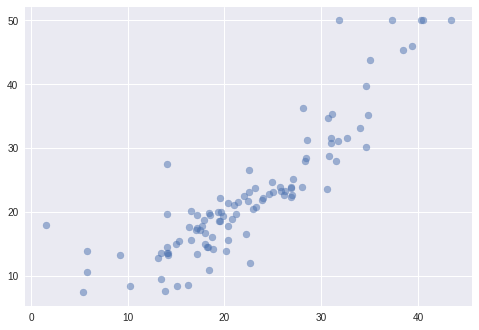

In [0]:

plt.scatter(ans_l, Y_test, alpha=0.5)
plt.show()

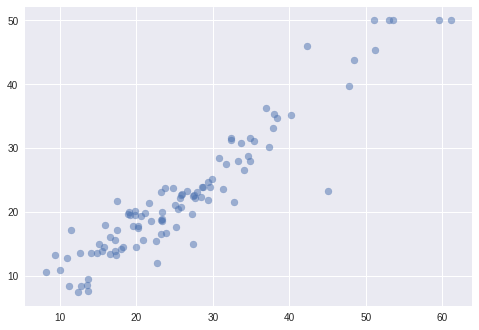

In [0]:


plt.scatter(ans_s, Y_test, alpha=0.5)
plt.show()

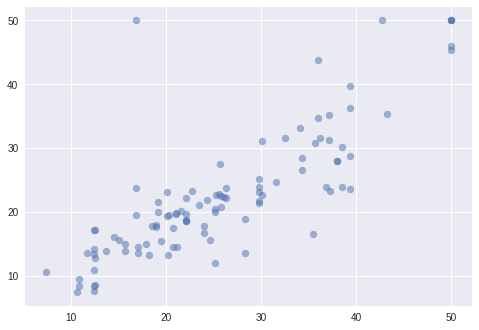

In [0]:

plt.scatter(ans_d, Y_test, alpha=0.5)
plt.show()

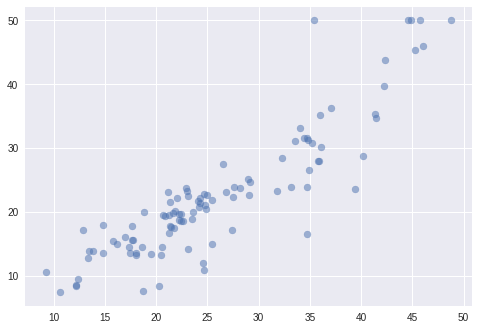

In [0]:

plt.scatter(ans_r, Y_test, alpha=0.5)
plt.show()

In [0]:
model_names=['Linear','SVM','Decision','Random']

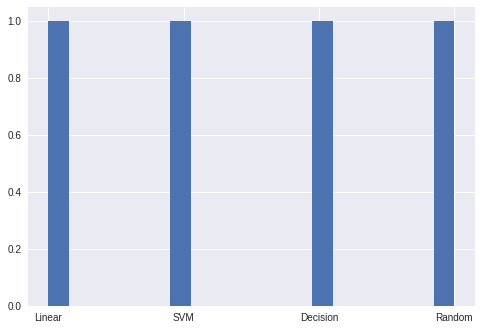

In [0]:
plt.hist(model_names,bins=20)
#plt.ylabel('No of times')
plt.show()

TypeError: ignored

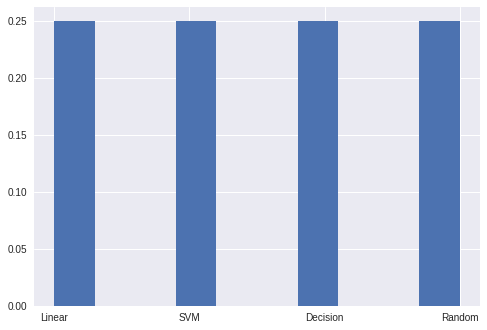

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#data = [1000, 1000, 5000, 3000, 4000, 16000, 2000]

plt.hist(model_names, weights=np.ones(len(model_names)) / len(model_names))

plt.gca().yaxis(model_result)
plt.show()

TypeError: ignored

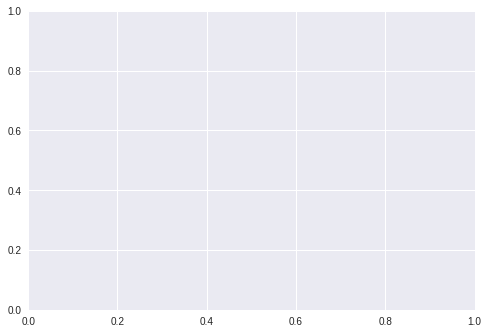

In [0]:
plt.hist2d(model_names,model_result)

In [0]:
model_names=np.array(model_names)
model_result=np.array(model_result)


In [0]:
x=[1,2,3,4]

(array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 array([23.67662028, 25.91950872, 28.16239716, 30.4052856 , 32.64817403,
        34.89106247, 37.13395091, 39.37683935, 41.61972779, 43.86261622,
        46.10550466]),
 <matplotlib.collections.QuadMesh at 0x7f25068b8320>)

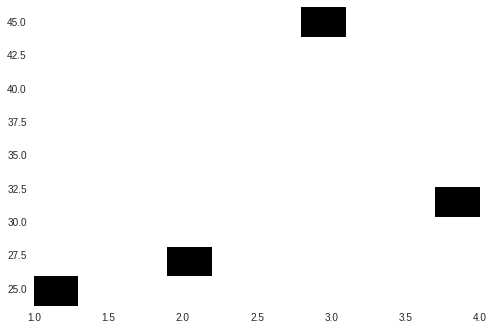

In [0]:
plt.hist2d(x,model_result)

In [0]:
model_result.shape

(4,)